In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
file="Resources/attacks.csv"
pd.set_option('display.max_columns', None)
df = pd.read_csv(file,encoding = 'cp1252')
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [4]:
df = df.drop(['Name', 'Injury',  'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], axis=1)
df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,M,NaN,N
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,M,NaN,N


In [5]:
df.drop_duplicates(subset="Case Number", inplace=True)

In [6]:
df = df[(df['Year'] >= 2000)]

In [7]:
df_us=df[(df["Country"]=="USA")]


df_us_2 = df_us.replace('Reported','', regex=True)
df_us_3 = df_us_2.replace('--','-', regex=True)
df_us_3['Date'] = df_us_3['Date'].str.strip()
df_us_3.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N)
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N
7,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,N
8,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,N


In [9]:
activities=pd.read_csv("Resources/activities.csv")

activities.drop("Count",axis=1,inplace=True)
activities.head()


,Activity,parent_activity
0,Surfing,on_water
1,Swimming,in_water
2,Wading,in_water
3,Fishing,fishing
4,Standing,other


In [10]:
df_us_4=pd.merge(df_us_3,activities,on="Activity",how="left")

df_us_4.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Sex,Age,Fatal (Y/N),parent_activity
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,F,57,N,in_water
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,F,11,N,other
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,M,48,N,on_water
3,2018.05.27,27-May-2018,2018.0,Unprovoked,USA,Florida,"Lighhouse Point Park, Ponce Inlet, Volusia County",Fishing,M,52,N,fishing
4,2018.05.26.b,26-May-2018,2018.0,Unprovoked,USA,Florida,"Cocoa Beach, Brevard County",Walking,M,15,N,other


In [11]:
df_us_4.parent_activity.value_counts()

on_water    494
in_water    310
fishing      95
other        46
science      18
Name: parent_activity, dtype: int64

In [12]:
df_us_4.groupby(['parent_activity','Area'],as_index=False).size().sort_values(by='size',ascending=False)

,parent_activity,Area,size
32,on_water,Florida,275
14,in_water,Florida,154
31,on_water,California,76
34,on_water,Hawaii,70
17,in_water,Hawaii,45
...,...,...,...
24,in_water,Palmyra Atoll,1
25,in_water,Puerto Rico,1
27,in_water,South Carolina,1
29,in_water,US Virgin Islands,1


In [13]:
lol=df_us_4.groupby(['parent_activity','Area'],as_index=False).size()


lol.loc[lol.parent_activity=='fishing'].sort_values(by='size',ascending=False)

,parent_activity,Area,size
3,fishing,Florida,44
1,fishing,California,20
4,fishing,Hawaii,9
11,fishing,Texas,9
7,fishing,Massachusetts,3
0,fishing,Alabama,2
5,fishing,Louisiana,2
6,fishing,Maryland,2
2,fishing,Delaware,1
8,fishing,New Jersey,1


In [14]:
lol


,parent_activity,Area,size
0,fishing,Alabama,2
1,fishing,California,20
2,fishing,Delaware,1
3,fishing,Florida,44
4,fishing,Hawaii,9
...,...,...,...
56,science,Kentucky,1
57,science,Palmyra Atoll,1
58,science,South Carolina,2
59,science,Texas,1


<function matplotlib.pyplot.show(close=None, block=None)>

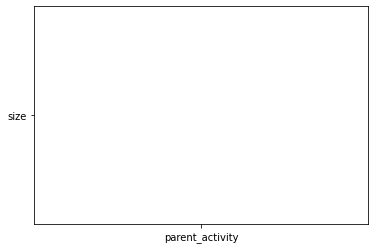

In [19]:
x=["parent_activity"]
y=["size"]

plt.bar(x,y)
plt.show

In [13]:
df_us_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1010
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Case Number      1011 non-null   object 
 1   Date             1011 non-null   object 
 2   Year             1011 non-null   float64
 3   Type             1011 non-null   object 
 4   Country          1011 non-null   object 
 5   Area             1011 non-null   object 
 6   Location         1005 non-null   object 
 7   Activity         963 non-null    object 
 8   Sex              985 non-null    object 
 9   Age              813 non-null    object 
 10  Fatal (Y/N)      949 non-null    object 
 11  parent_activity  963 non-null    object 
dtypes: float64(1), object(11)
memory usage: 102.7+ KB
